In [9]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
%matplotlib inline

In [16]:
import sys; sys.path.append("../../offline/")
import sparse, geom, utils

In [17]:
path_to_data = "../../data/sparse/" # scratch/sparse on Maxwell
path_to_aux = "../../data/aux/" # scratch/benedikt/aux on Maxwell
path_to_geometry = "../../geometry/"

In [14]:
run = 592

In [18]:
with h5py.File(path_to_aux + "goodpixels.h5", 'r') as f:
    goodpixels = f['data/data'][:]

In [19]:
with sparse.Run(path_to_data + "r%04d.h5" %run) as r:
    cells = r.cellIds
    score = r.litpixel
goodcells = np.ones(len(cells), dtype=np.bool)
goodcells[cells == 0] = False

In [20]:
strongest = np.argsort(score)[::-1][0]

In [21]:
with sparse.Frame(path_to_data+"r%04d.h5" %run, geometry=path_to_geometry+"b1.geom", goodmask=goodpixels) as f:
    img = np.float64(f.assembled(strongest))
    msk = (f.activepixels & f.goodpixels)

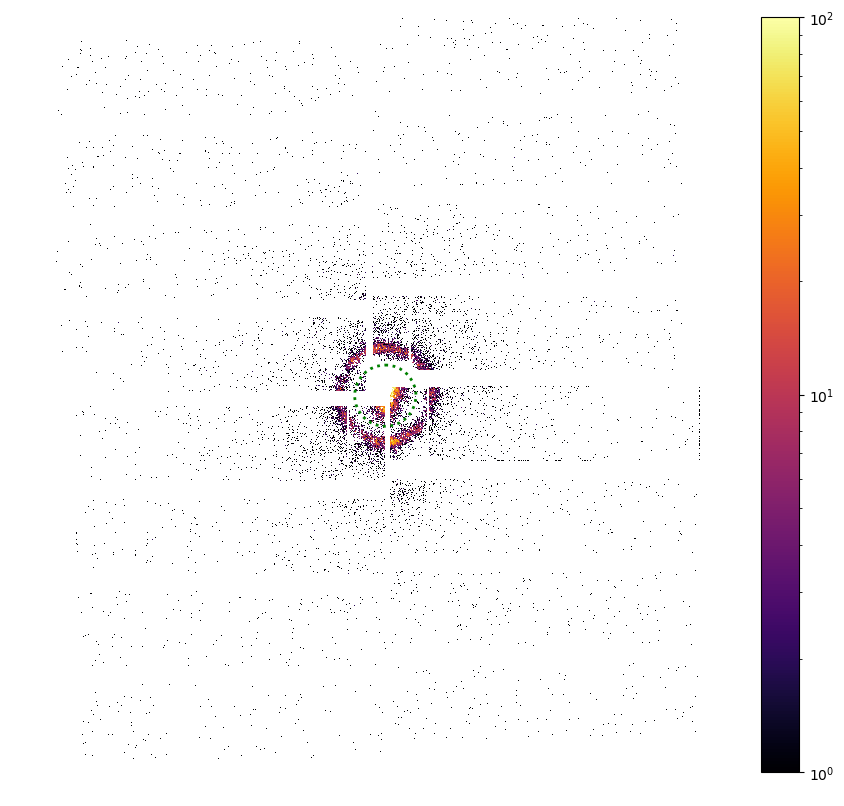

In [22]:
mimg = np.ma.masked_array(img, mask=~msk)
mimg.data[mimg.data==0] = 1e-10
cmap = cm.get_cmap('inferno')
cmap.set_bad('1.0')
cmap.set_under('1.0')
plt.figure(figsize=(12,10), dpi=100)
plt.axis('off')
plt.imshow(mimg, norm=colors.LogNorm(vmin=1, vmax=100), cmap=cmap)
plt.gca().add_patch(plt.Circle((560,642), q_to_x(1./14), fill=False, ls=':', lw=2, color='g'))
plt.colorbar()
plt.show()

In [5]:
distance = 0.705 #[m]
wavelength = 1240. / 6010. #[nm]
pixelsize = 200e-6 #[m]
q_to_x = lambda q: np.tan(2.*np.arcsin(wavelength * q / 2.)) * distance / pixelsize

In [8]:
q_to_x(1./14.)

51.953363886455364

In [19]:
wavelength

206.32279534109819